In [ ]:
import glob
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# def make_data(patch_size=9):
#     """
#     Load the image data and create patches from it.
#     Args:
#         patch_size: The size of the patches to create.
#     Returns:
#         images_long: A list of numpy arrays of the original images.
#         patches: A list of lists of patches for each image.
#     """

#     # load images
#     filepaths = glob.glob(os.path.join("D:/Berkeley/Spring/stat-214/image_data", "*.npz"))
#     images_long = []
#     for fp in filepaths:
#         npz_data = np.load(fp)
#         key = list(npz_data.files)[0]
#         data = npz_data[key]
#         if data.shape[1] == 11:
#             data = data[:, :-1]  # remove labels
#             images_long.append(data)

#     # Compute global min and max for x and y over all images
#     all_y = np.concatenate([img[:, 0] for img in images_long]).astype(int)
#     all_x = np.concatenate([img[:, 1] for img in images_long]).astype(int)
#     global_miny, global_maxy = all_y.min(), all_y.max()
#     global_minx, global_maxx = all_x.min(), all_x.max()
#     height = int(global_maxy - global_miny + 1)
#     width = int(global_maxx - global_minx + 1)

#     # Reshape each image onto the common grid.
#     nchannels = images_long[0].shape[1] - 2
#     images = []
#     for img in images_long:
#         y = img[:, 0].astype(int)
#         x = img[:, 1].astype(int)
#         # Use global minimums to get relative coordinates.
#         y_rel = y - global_miny
#         x_rel = x - global_minx
#         image = np.zeros((nchannels, height, width))
#         valid_mask = (y_rel >= 0) & (y_rel < height) & (x_rel >= 0) & (x_rel < width)
#         y_valid = y_rel[valid_mask]
#         x_valid = x_rel[valid_mask]
#         img_valid = img[valid_mask]
#         for c in range(nchannels):
#             image[c, y_valid, x_valid] = img_valid[:, c + 2]
#         images.append(image)
#     print('done reshaping images')

#     # Now that all images have the same shape, convert to a 4D array.
#     images = np.array(images)
#     pad_len = patch_size // 2

#     # Global normalization across images.
#     means = np.mean(images, axis=(0, 2, 3))[:, None, None]
#     stds = np.std(images, axis=(0, 2, 3))[:, None, None]
#     images = (images - means) / stds

#     patches = []
#     for i in range(len(images_long)):
#         if i % 10 == 0:
#             print(f'working on image {i}')
#         patches_img = []
#         # Pad the image by reflecting across the border.
#         img_mirror = np.pad(
#             images[i],
#             ((0, 0), (pad_len, pad_len), (pad_len, pad_len)),
#             mode="reflect",
#         )
#         # Use global min values to compute relative indices.
#         ys = images_long[i][:, 0].astype(int)
#         xs = images_long[i][:, 1].astype(int)
#         for y, x in zip(ys, xs):
#             y_idx = int(y - global_miny + pad_len)
#             x_idx = int(x - global_minx + pad_len)
#             patch = img_mirror[
#                 :,
#                 y_idx - pad_len : y_idx + pad_len + 1,
#                 x_idx - pad_len : x_idx + pad_len + 1,
#             ]
#             patches_img.append(patch.astype(np.float32))
#         patches.append(patches_img)

#     return images_long, patches


### For the 3 labeled images, plot the expert labels for the presence or absence of clouds according to a map (i.e. use the X, Y coordinates).

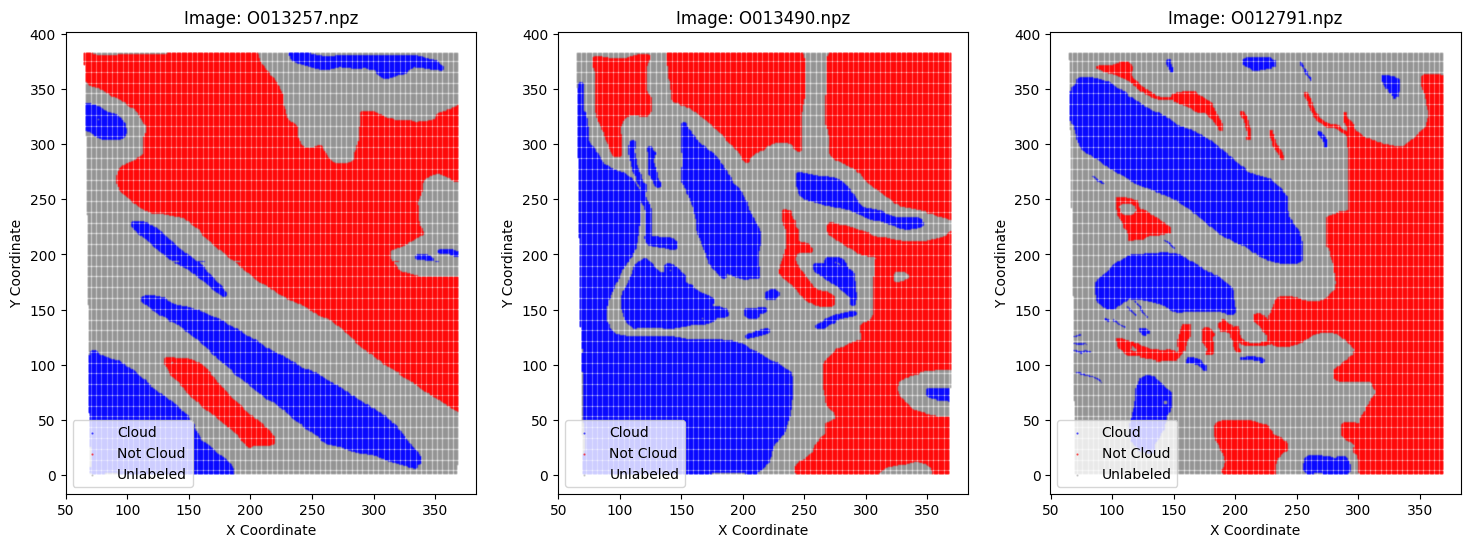

In [ ]:
import matplotlib.pyplot as plt

filepaths = glob.glob(os.path.join("D:/Berkeley/Spring/stat-214/image_data", "*.npz"))
images_long = []
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

for i, fp in enumerate(labeled_files):
    npz_data = np.load(os.path.join("D:/Berkeley/Spring/stat-214/image_data", fp))
    key = list(npz_data.files)[0]
    image_data = npz_data[key]
    if image_data.shape[1] == 11:
        # image_data = image_data[:, :-1]  # remove labels
        # images_long.append(data)

        x = image_data[:, 1] 
        y = image_data[:, 0]  
        labels = image_data[:, 10]

        ax = axes[i]

        cloud_mask = (labels == 1)
        ax.scatter(x[cloud_mask], y[cloud_mask], s=0.5, c='blue', alpha=0.5, label='Cloud')
        
        # plot non-cloud points (label = -1) in red
        noncloud_mask = (labels == -1)
        ax.scatter(x[noncloud_mask], y[noncloud_mask], s=0.5, c='red', alpha=0.5, label='Not Cloud')
        
        # if there are unlabeled points (label = 0), plot them in gray
        unlabeled_mask = (labels == 0)
        if np.any(unlabeled_mask):
            ax.scatter(x[unlabeled_mask], y[unlabeled_mask], s=0.5, c='gray', alpha=0.3, label='Unlabeled')
        
        ax.set_title(f'Image: {fp}')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.legend()


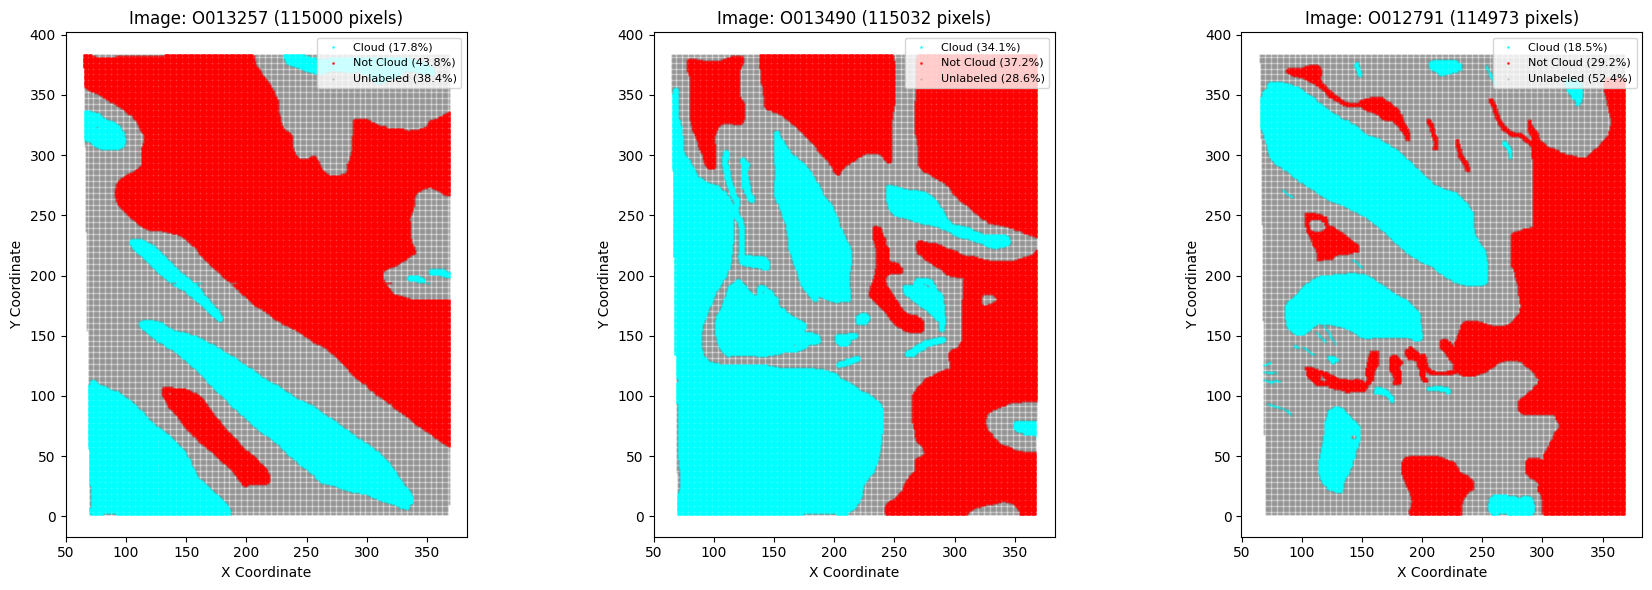

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

for i, fp in enumerate(labeled_files):
    # Load the data
    npz_data = np.load(os.path.join("D:/Berkeley/Spring/stat-214/image_data", fp))
    key = list(npz_data.files)[0]
    image_data = npz_data[key]
    
    # extract coordinates and labels
    x = image_data[:, 1]  
    y = image_data[:, 0]  
    labels = image_data[:, 10] 
    
    # cal statistics for title
    cloud_percent = np.sum(labels == 1) / len(labels) * 100
    noncloud_percent = np.sum(labels == -1) / len(labels) * 100
    unlabeled_percent = np.sum(labels == 0) / len(labels) * 100
    
    ax = axes[i]
    
    # plot with improved visibility
    cloud_mask = (labels == 1)
    ax.scatter(x[cloud_mask], y[cloud_mask], s=1, c='cyan', alpha=0.7, label=f'Cloud ({cloud_percent:.1f}%)')
    
    noncloud_mask = (labels == -1)
    ax.scatter(x[noncloud_mask], y[noncloud_mask], s=1, c='red', alpha=0.7, label=f'Not Cloud ({noncloud_percent:.1f}%)')
    
    unlabeled_mask = (labels == 0)
    if np.any(unlabeled_mask):
        ax.scatter(x[unlabeled_mask], y[unlabeled_mask], s=0.5, c='gray', alpha=0.3, label=f'Unlabeled ({unlabeled_percent:.1f}%)')
    
    # improve plot appearance
    ax.set_title(f'Image: {fp.split(".")[0]} ({len(labels)} pixels)')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_aspect('equal')
    ax.legend(loc='upper right', fontsize=8)
    
plt.tight_layout()
plt.savefig('cloud_maps.png', dpi=300)
plt.show()

### Explore the relationships between the radiances of different angles, both visually and quantitatively. Do you notice differences between the two classes (cloud, no cloud) based on the radiances? Are there differences based on the features (CORR, NDAI, SD)?

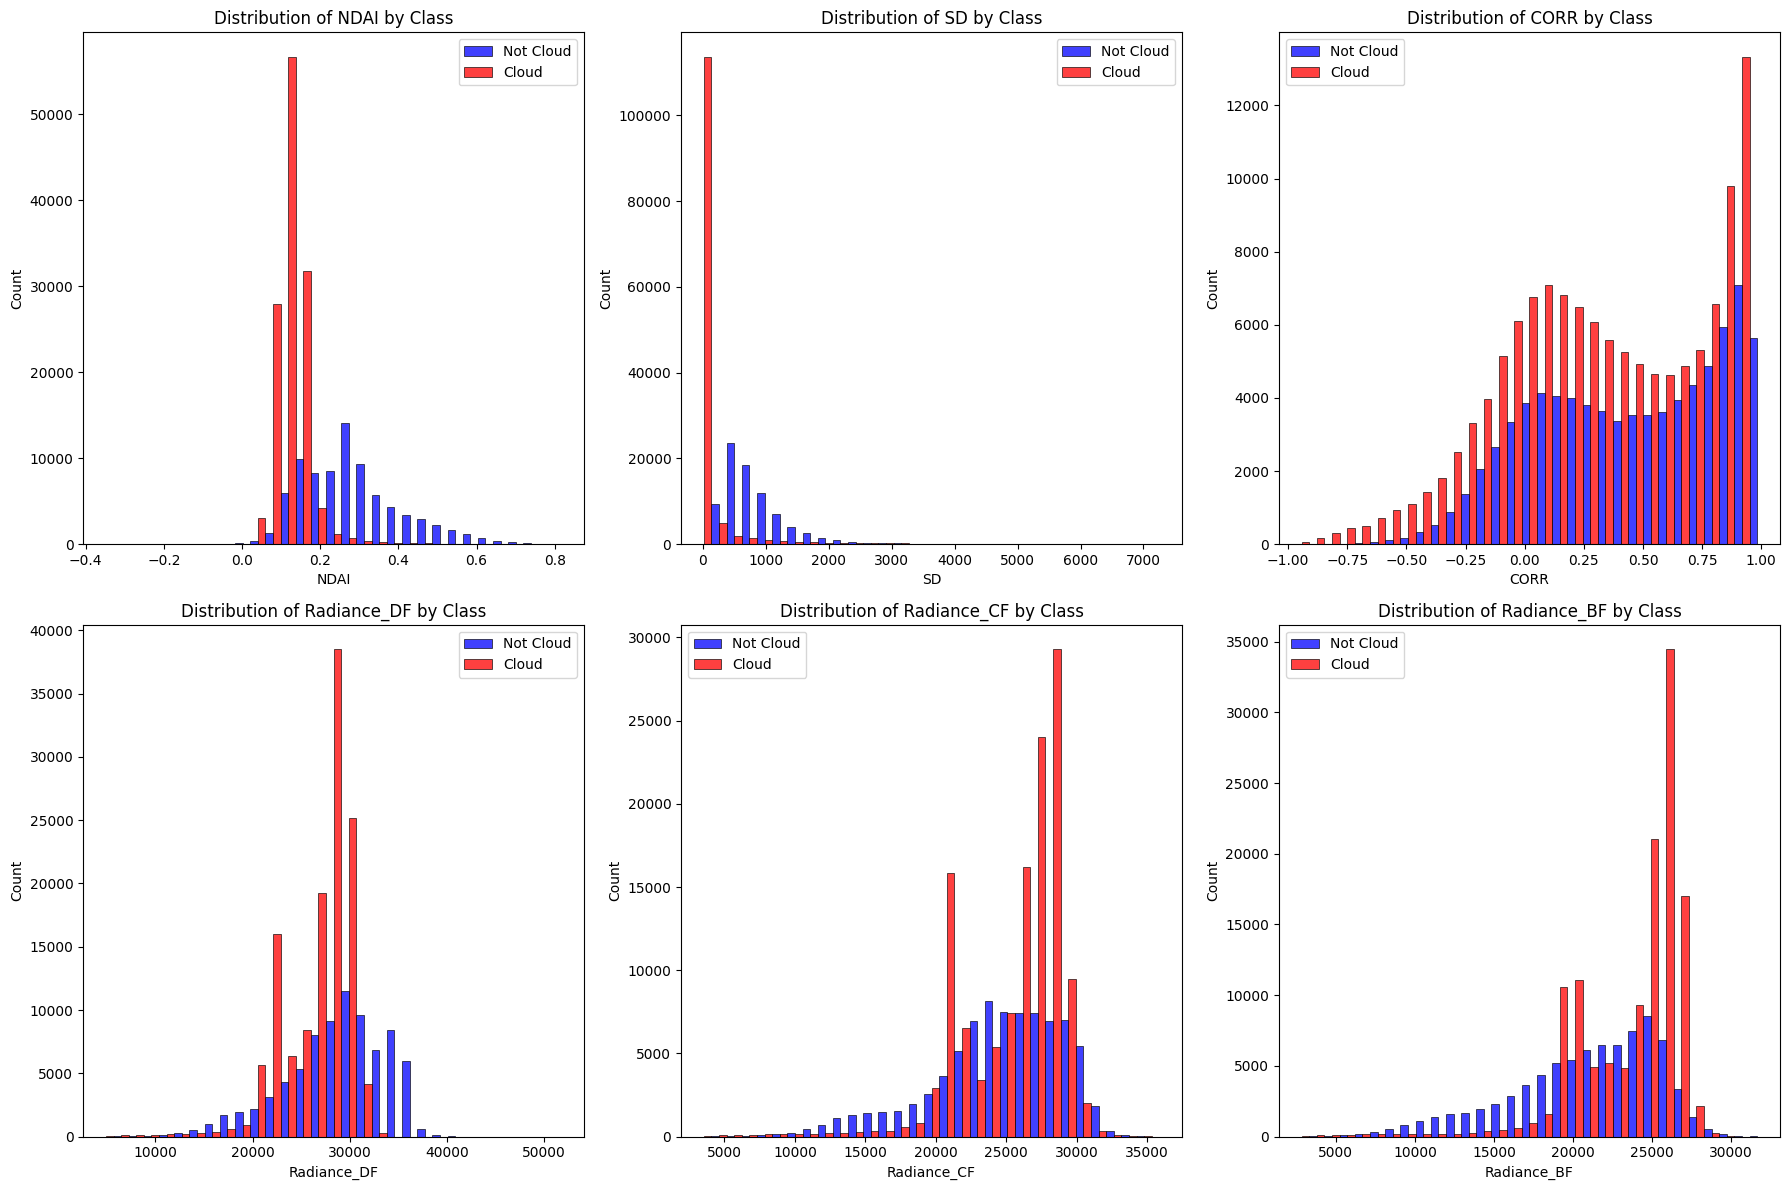

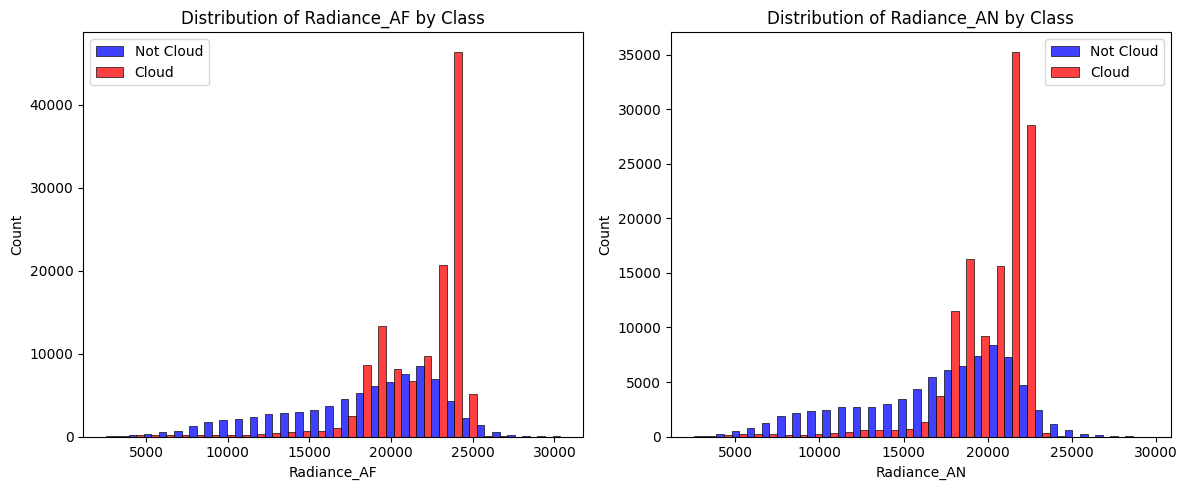

<Figure size 2000x1600 with 0 Axes>

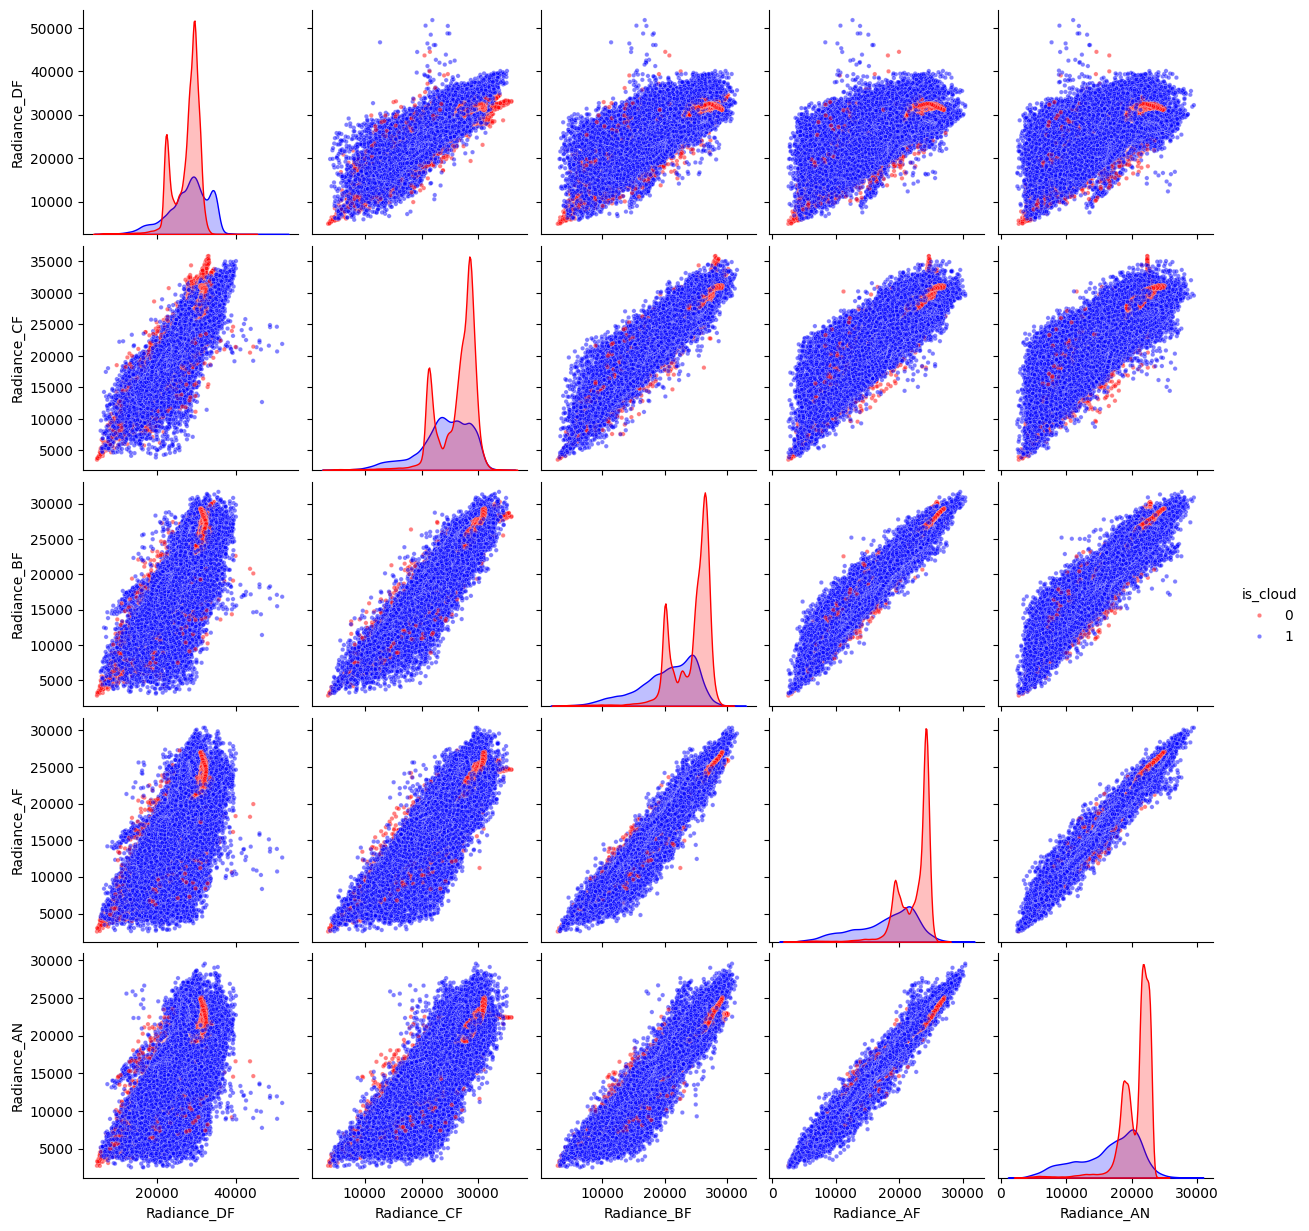

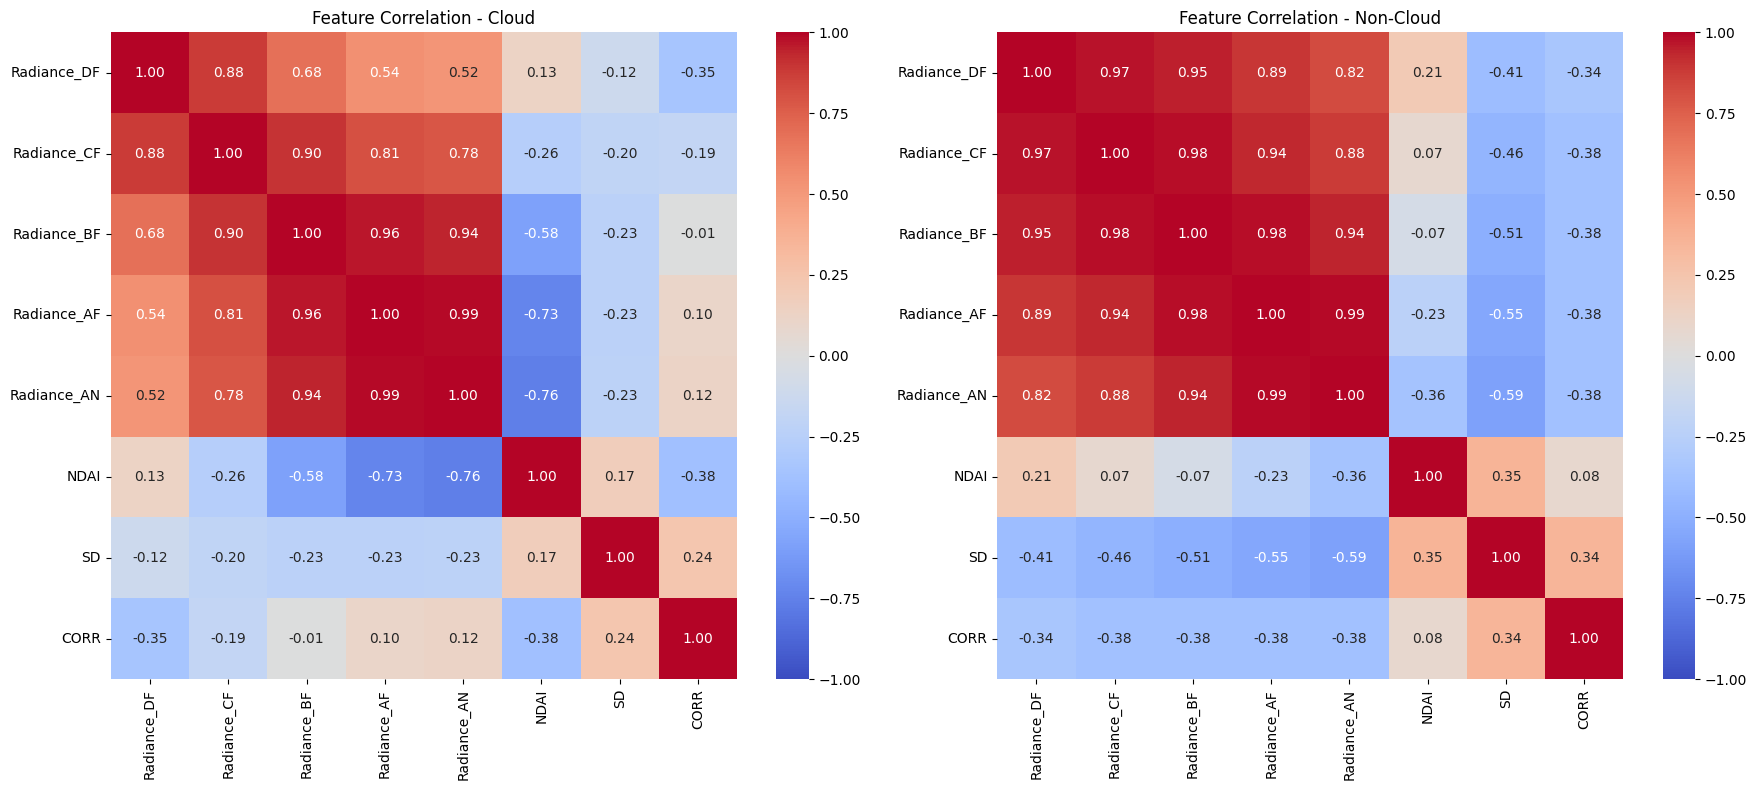

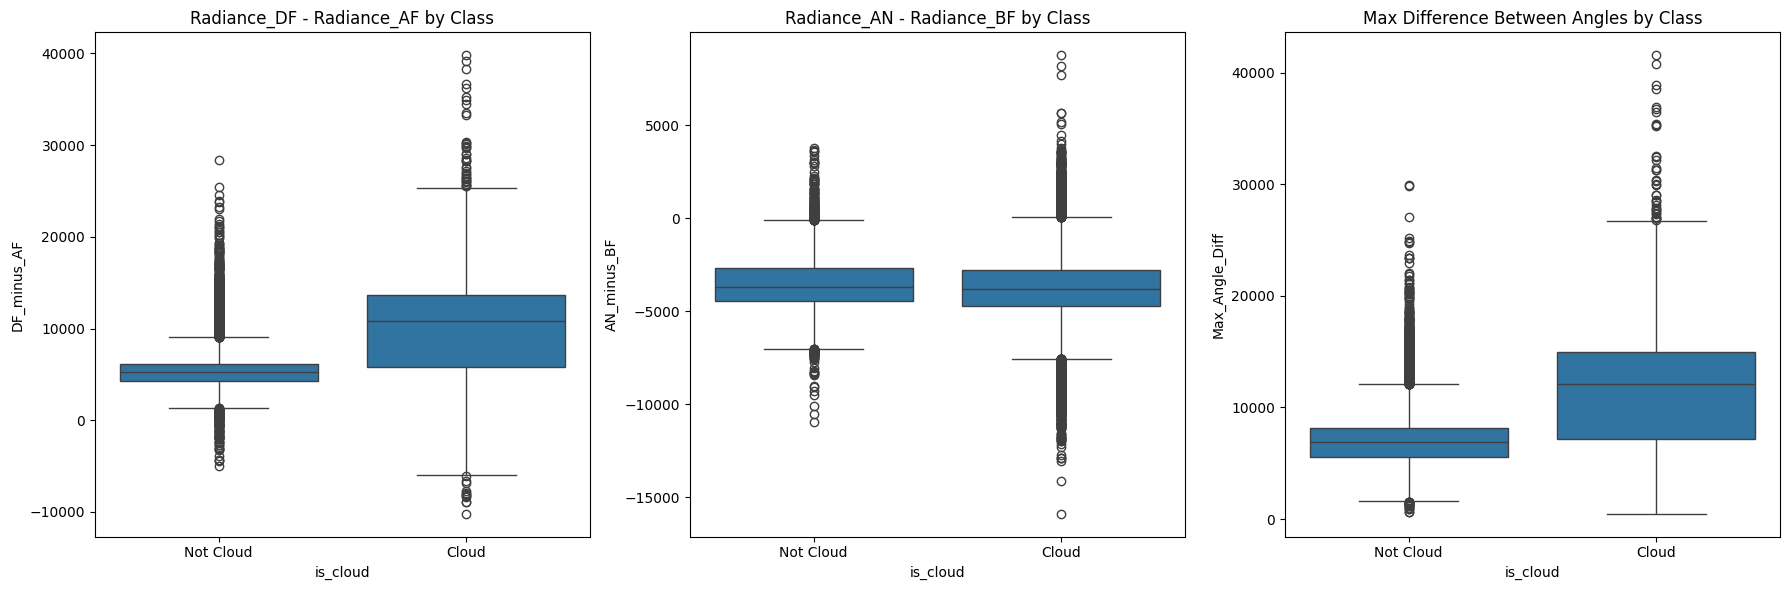

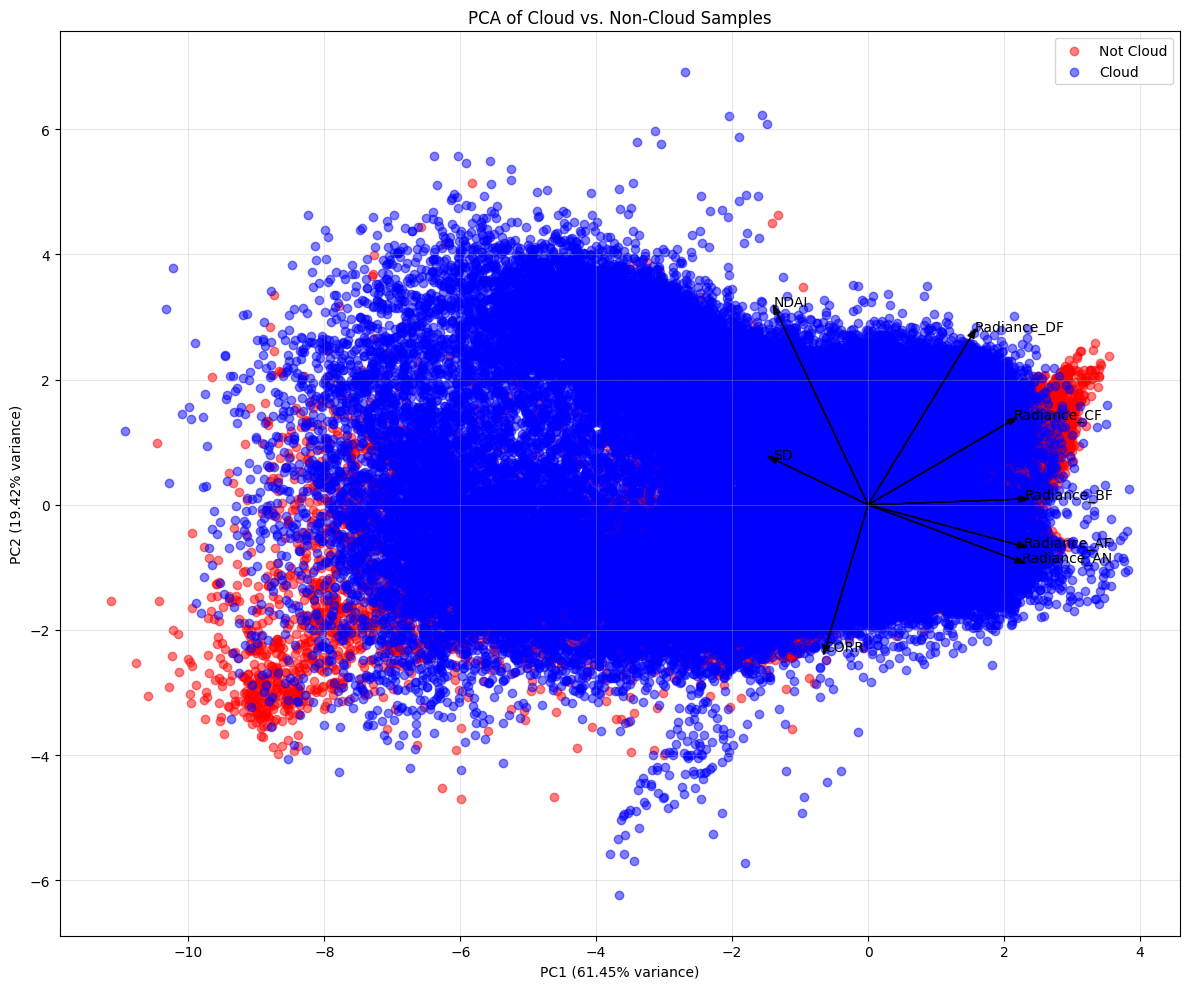

Feature importance based on PCA loadings for PC1:
Radiance_DF: 0.3023
Radiance_CF: 0.4129
Radiance_BF: 0.4438
Radiance_AF: 0.4405
Radiance_AN: 0.4343
NDAI: 0.2671
SD: 0.2684
CORR: 0.1230


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# File paths for the three labeled images
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

# Load and combine data from all labeled images
all_data = []

for file_path in labeled_files:
    # Load the image data
    npz_data =  np.load(os.path.join("D:/Berkeley/Spring/stat-214/image_data", file_path))
    key = list(npz_data.files)[0]
    image_data = npz_data[key]
    
    # Create a DataFrame
    columns = ['y', 'x', 'NDAI', 'SD', 'CORR', 
              'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 
              'Radiance_AF', 'Radiance_AN', 'label']
    
    df = pd.DataFrame(image_data, columns=columns)
    df['image'] = file_path  # Add image identifier
    
    # Only include labeled points
    df = df[(df['label'] == 1) | (df['label'] == -1)]
    
    all_data.append(df)

# Combine all labeled data
combined_data = pd.concat(all_data)

# Create a binary class label for easier visualization
combined_data['is_cloud'] = (combined_data['label'] == 1).astype(int)

# 1. Feature Distributions by Class
plt.figure(figsize=(18, 12))

# Plot histograms for features by class
features = ['NDAI', 'SD', 'CORR']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=combined_data, x=feature, hue='is_cloud', 
                 multiple='dodge', bins=30, 
                 palette={0:'red', 1:'blue'})
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Not Cloud', 'Cloud'])

# Plot histograms for radiance angles by class
radiance_angles = ['Radiance_DF', 'Radiance_CF', 'Radiance_BF', 
                  'Radiance_AF', 'Radiance_AN']
for i, angle in enumerate(radiance_angles, 4):
    if i <= 6:  # Only show three in the first figure
        plt.subplot(2, 3, i)
        sns.histplot(data=combined_data, x=angle, hue='is_cloud', 
                     multiple='dodge', bins=30, 
                     palette={0:'red', 1:'blue'})
        plt.title(f'Distribution of {angle} by Class')
        plt.xlabel(angle)
        plt.ylabel('Count')
        plt.legend(['Not Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300)
plt.show()

# Continue with the remaining radiance angles
plt.figure(figsize=(12, 5))
for i, angle in enumerate(radiance_angles[3:], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=combined_data, x=angle, hue='is_cloud', 
                 multiple='dodge', bins=30, 
                 palette={0:'red', 1:'blue'})
    plt.title(f'Distribution of {angle} by Class')
    plt.xlabel(angle)
    plt.ylabel('Count')
    plt.legend(['Not Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('radiance_distributions_2.png', dpi=300)
plt.show()

# 2. Pairwise Relationships - Radiance Angles
plt.figure(figsize=(20, 16))
sns.pairplot(combined_data, vars=radiance_angles, 
             hue='is_cloud', palette={0:'red', 1:'blue'}, 
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.savefig('radiance_pairplot.png', dpi=300)
plt.show()

# 3. Correlation Analysis
# Separate data by class
cloud_data = combined_data[combined_data['is_cloud'] == 1]
noncloud_data = combined_data[combined_data['is_cloud'] == 0]

# Compute correlation matrices
cloud_corr = cloud_data[radiance_angles + features].corr()
noncloud_corr = noncloud_data[radiance_angles + features].corr()

# Plot correlation matrices
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(cloud_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation - Cloud')

plt.subplot(1, 2, 2)
sns.heatmap(noncloud_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation - Non-Cloud')

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300)
plt.show()

# 4. Feature Importance Analysis
# Create features specifically showing differences between angles
combined_data['DF_minus_AF'] = combined_data['Radiance_DF'] - combined_data['Radiance_AF']
combined_data['AN_minus_BF'] = combined_data['Radiance_AN'] - combined_data['Radiance_BF']
combined_data['Max_Angle_Diff'] = combined_data[radiance_angles].max(axis=1) - combined_data[radiance_angles].min(axis=1)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='is_cloud', y='DF_minus_AF', data=combined_data)
plt.title('Radiance_DF - Radiance_AF by Class')
plt.xticks([0, 1], ['Not Cloud', 'Cloud'])

plt.subplot(1, 3, 2)
sns.boxplot(x='is_cloud', y='AN_minus_BF', data=combined_data)
plt.title('Radiance_AN - Radiance_BF by Class')
plt.xticks([0, 1], ['Not Cloud', 'Cloud'])

plt.subplot(1, 3, 3)
sns.boxplot(x='is_cloud', y='Max_Angle_Diff', data=combined_data)
plt.title('Max Difference Between Angles by Class')
plt.xticks([0, 1], ['Not Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('angle_differences.png', dpi=300)
plt.show()

# 5. PCA visualization of the features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features
X = combined_data[radiance_angles + features].values
y = combined_data['is_cloud'].values

# Standardize data
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create PCA plot
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.5, color='red', label='Not Cloud')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.5, color='blue', label='Cloud')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Cloud vs. Non-Cloud Samples')
plt.legend()
plt.grid(alpha=0.3)

# Add loading vectors
feature_names = radiance_angles + features
loadings = pca.components_.T
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x*5, y*5, color='k', alpha=0.9, head_width=0.1)
    plt.text(x*5.2, y*5.2, feature_names[i], color='k')

plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300)
plt.show()

# Print feature importance information
print("Feature importance based on PCA loadings for PC1:")
for i, name in enumerate(feature_names):
    print(f"{name}: {abs(loadings[i, 0]):.4f}")

In [ ]:

for file_path in labeled_files:
    npz_data =  np.load(os.path.join("D:/Berkeley/Spring/stat-214/image_data", file_path))

    key = list(npz_data.files)[0]
    image_data = npz_data[key]
    
    # Create a DataFrame
    columns = ['y', 'x', 'NDAI', 'SD', 'CORR', 
              'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 
              'Radiance_AF', 'Radiance_AN', 'label']
    df = pd.DataFrame(image_data, columns=columns)
    
    # Check for NaN values
    print(f"File: {file_path}")
    print(f"Missing values:\n{df.isnull().sum()}")
    
    # Check for invalid values (negative radiance, etc.)
    for col in ['Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']:
        invalid = (df[col] < 0).sum()
        print(f"Invalid {col} values: {invalid}")

File: O013257.npz
Missing values:
y              0
x              0
NDAI           0
SD             0
CORR           0
Radiance_DF    0
Radiance_CF    0
Radiance_BF    0
Radiance_AF    0
Radiance_AN    0
label          0
dtype: int64
Invalid Radiance_DF values: 0
Invalid Radiance_CF values: 0
Invalid Radiance_BF values: 0
Invalid Radiance_AF values: 0
Invalid Radiance_AN values: 0
File: O013490.npz
Missing values:
y              0
x              0
NDAI           0
SD             0
CORR           0
Radiance_DF    0
Radiance_CF    0
Radiance_BF    0
Radiance_AF    0
Radiance_AN    0
label          0
dtype: int64
Invalid Radiance_DF values: 0
Invalid Radiance_CF values: 0
Invalid Radiance_BF values: 0
Invalid Radiance_AF values: 0
Invalid Radiance_AN values: 0
File: O012791.npz
Missing values:
y              0
x              0
NDAI           0
SD             0
CORR           0
Radiance_DF    0
Radiance_CF    0
Radiance_BF    0
Radiance_AF    0
Radiance_AN    0
label          0
dtype: int6

In [8]:
# Detect and handle outliers using IQR method
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a mask for outliers
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = outlier_mask.sum()
        print(f"Found {outlier_count} outliers in {col}")
        
        # Option 1: Remove outliers
        # df_clean = df_clean[~outlier_mask]
        
        # Option 2: Cap outliers
        df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
        df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
        
    return df_clean

# Apply to numeric features
numeric_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 
               'Radiance_BF', 'Radiance_AF', 'Radiance_AN']
clean_df = handle_outliers(df, numeric_cols)

Found 4788 outliers in NDAI
Found 6792 outliers in SD
Found 106 outliers in CORR
Found 2577 outliers in Radiance_DF
Found 5004 outliers in Radiance_CF
Found 9343 outliers in Radiance_BF
Found 11086 outliers in Radiance_AF
Found 11589 outliers in Radiance_AN
